<h4><font face='宋体'>

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
data = pd.read_csv('Disease_Incidence_Rate.csv')
data.head()

,Date,Average Rainfall (mm),Temperature Variability (C),Flood Incidence (count),Airborne Particulate Matter (µg/m³),Healthcare Access Index,Disease Incidence Rate (%)
0,2010-01-31,157.482769,5.811496,2,24.049382,0.680702,5.108111
1,2010-02-28,218.241656,3.808232,0,53.744938,0.929897,13.265511
2,2010-03-31,118.845294,7.123808,1,24.377933,0.703402,13.009807
3,2010-04-30,126.578375,9.831849,1,134.294150,0.664117,6.044545
4,2010-05-31,247.246290,6.827945,5,51.641569,0.726995,10.768574


In [6]:
# 从日期中提取月份作为新特征
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month


In [7]:
# 准备特征和目标变量
X = data.drop(['Date', 'Disease Incidence Rate (%)'], axis=1)
y = data['Disease Incidence Rate (%)']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

C:\Users\paq13\AppData\Local\Temp\ipykernel_10280\2441111888.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


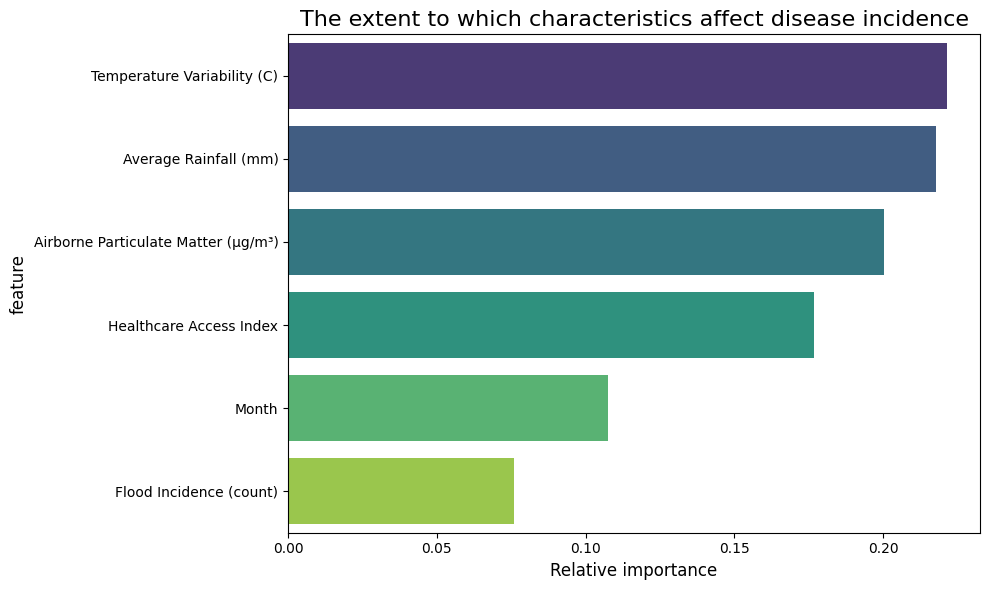

In [9]:
# 特征重要性分析
feature_importance = rf.feature_importances_
features = X.columns

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('The extent to which characteristics affect disease incidence', fontsize=16)
plt.xlabel('Relative importance', fontsize=12)
plt.ylabel('feature', fontsize=12)
plt.tight_layout()
plt.show()



C:\Users\paq13\AppData\Local\Temp\ipykernel_10280\4036782110.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Permutation Importance', y='Feature', data=perm_importance_df, palette='magma')


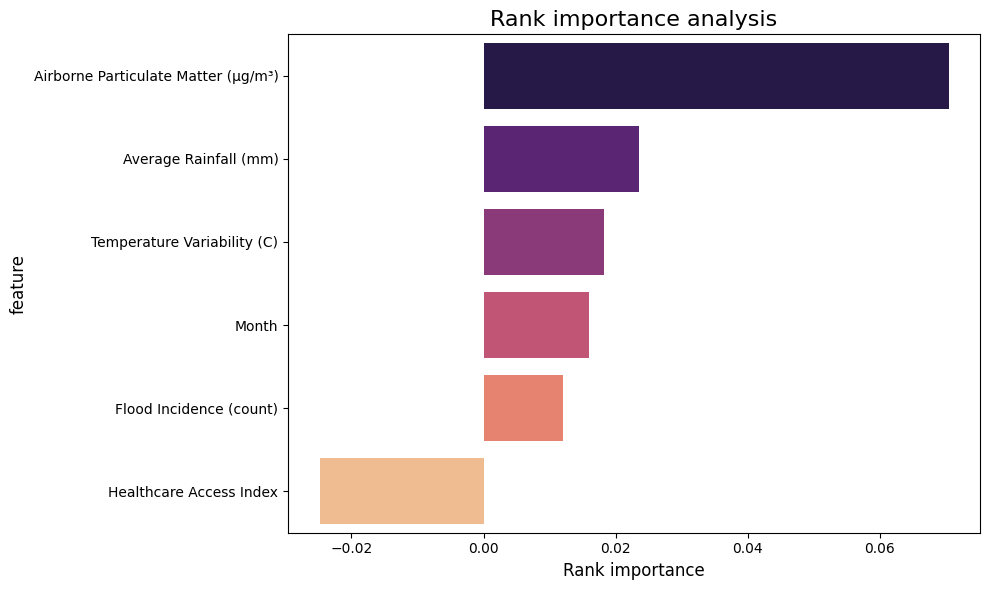

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [10]:
# 排列重要性分析
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42
)

# 创建排列重要性DataFrame
perm_importance = result.importances_mean
perm_importance_df = pd.DataFrame({
    'Feature': features,
    'Permutation Importance': perm_importance
}).sort_values('Permutation Importance', ascending=False)

# 可视化排列重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Permutation Importance', y='Feature', data=perm_importance_df, palette='magma')
plt.title('Rank importance analysis', fontsize=16)
plt.xlabel('Rank importance', fontsize=12)
plt.ylabel('feature', fontsize=12)
plt.tight_layout()
plt.show()

# 特征与疾病发病率的关系分析
plt.figure(figsize=(12, 8))



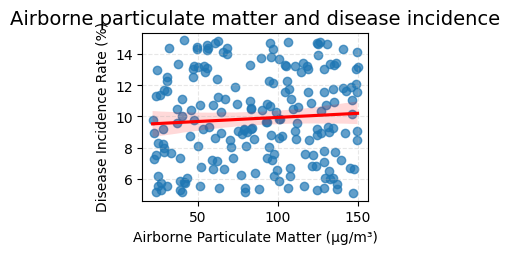

In [11]:
# 1. 空气颗粒物与疾病发病率
plt.subplot(2, 2, 1)
sns.regplot(x='Airborne Particulate Matter (µg/m³)', y='Disease Incidence Rate (%)', 
            data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Airborne particulate matter and disease incidence', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)


C:\Users\paq13\AppData\Local\Temp\ipykernel_10280\1901929193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Flood Incidence (count)', y='Disease Incidence Rate (%)',


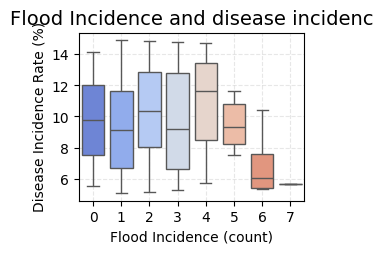

In [13]:
# 2. 洪水发生次数与疾病发病率
plt.subplot(2, 2, 2)
sns.boxplot(x='Flood Incidence (count)', y='Disease Incidence Rate (%)', 
           data=data, palette='coolwarm')
plt.title('Flood Incidence and disease incidenc', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)



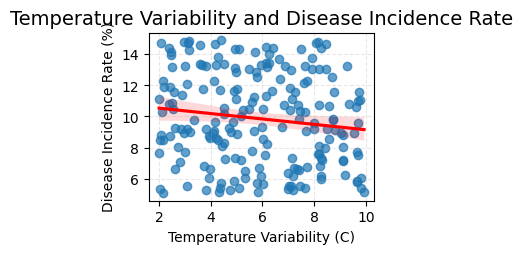

In [14]:
# 3. 温度变化与疾病发病率
plt.subplot(2, 2, 3)
sns.regplot(x='Temperature Variability (C)', y='Disease Incidence Rate (%)', 
            data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Temperature Variability and Disease Incidence Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)



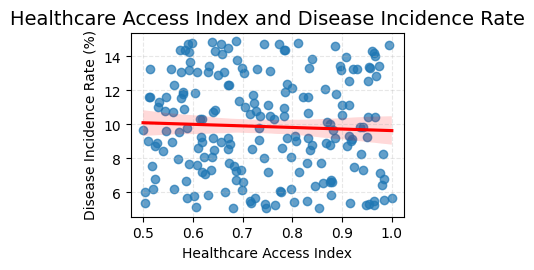

In [15]:
# 4. 医疗可及性与疾病发病率
plt.subplot(2, 2, 4)
sns.regplot(x='Healthcare Access Index', y='Disease Incidence Rate (%)', 
            data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Healthcare Access Index and Disease Incidence Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

